In [52]:
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
#plt.rc("font", size=14)
#plt.rcParams['axes.grid'] = True
#plt.figure(figsize=(6,3))
#plt.gray()
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,matthews_corrcoef,precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("creditcard.csv")

# Data Processing & Understanding

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking the class distribution of the target variable
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
Total_transactions = len(data)
normal = len(data[data.Class == 0])
fraudulent = len(data[data.Class == 1])
fraud_percentage = round(fraudulent/normal*100, 2)
print(cl('Total number of Trnsactions are {}'.format(Total_transactions), attrs = ['bold']))
print(cl('Number of Normal Transactions are {}'.format(normal), attrs = ['bold']))
print(cl('Number of fraudulent Transactions are {}'.format(fraudulent), attrs = ['bold']))
print(cl('Percentage of fraud Transactions is {}'.format(fraud_percentage), attrs = ['bold']))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17


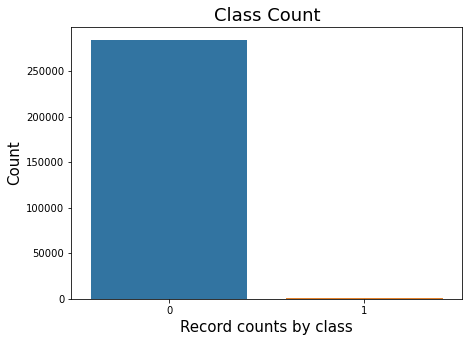

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(data['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [8]:
# Checking the correlation
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


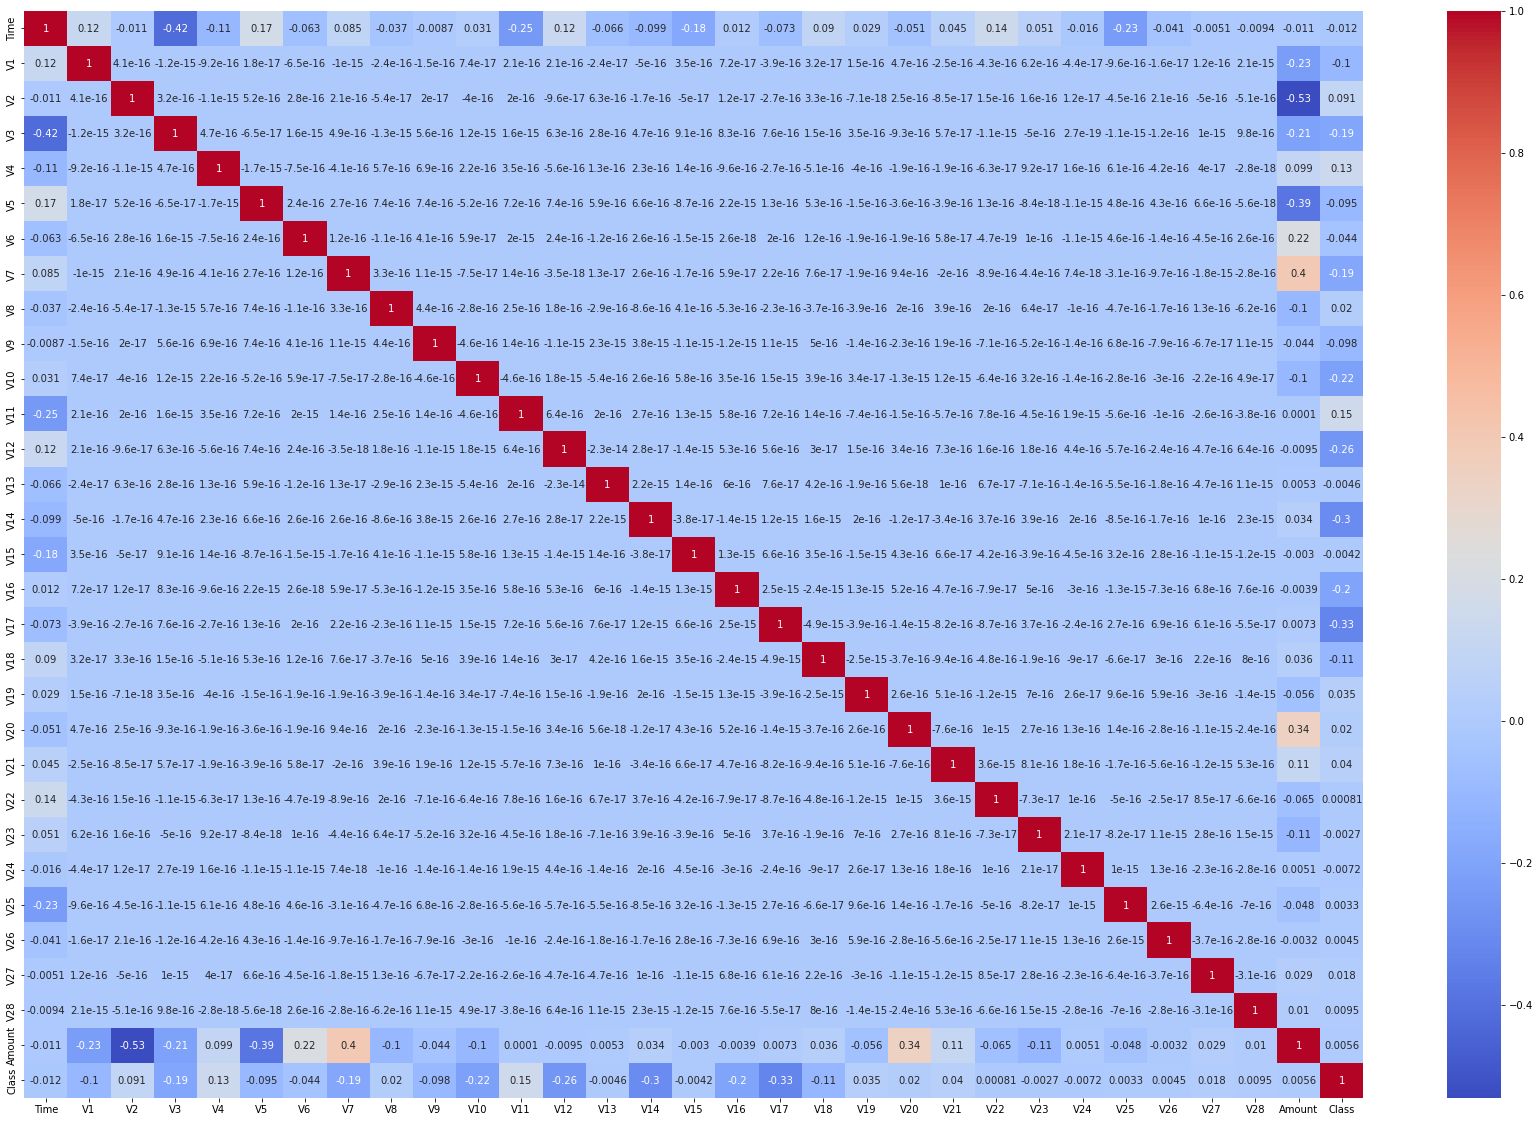

In [9]:
# Checking the correlation in heatmap
plt.figure(figsize=(30,20))

sns.heatmap(corr, cmap="coolwarm", annot=True,linecolor='green')
plt.show()

In [9]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

one more variable which is the time which can be an external deciding factor — but in our modelling process, we can drop it.

In [10]:
data.drop(['Time'], axis=1, inplace=True)

In [11]:
data.shape

(284807, 30)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(275663, 30)

 We now have properly scaled data with no duplicate, no missing. Let’s now split it for our model building

# Train & Test Split

In [14]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# model building

We will be trying different machine learning models one by one. Defining models are much easier. A single line of code can define our model. And, in the same way, a single line of code can fit the model on our data.

# Logistic Regression

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [17]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9989552498694062


In [18]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.6666666666666666


In [48]:
MCC = matthews_corrcoef(y_test,lr_yhat )
print("The Matthews correlation coefficient is{}".format(MCC))

The Matthews correlation coefficient is0.6779229243512138


In [56]:
prec = precision_score(y_test, lr_yhat)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test,lr_yhat)
print("The recall is {}".format(rec))

The precision is 0.8181818181818182
The recall is 0.5625


In [59]:
confusion_matrix(y_test, lr_yhat , labels = [0, 1])

array([[68772,    16],
       [   56,    72]], dtype=int64)

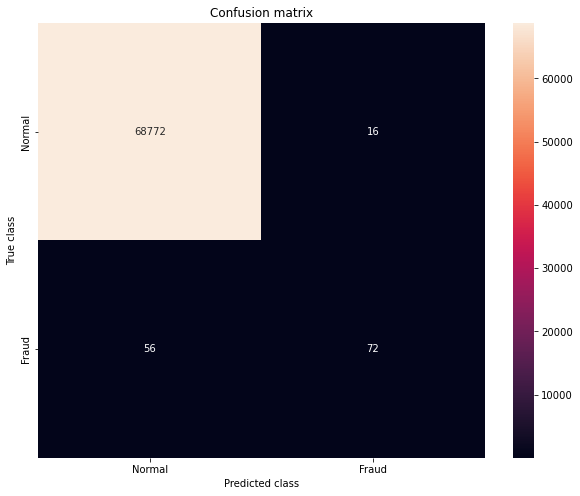

In [65]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,lr_yhat )
plt.figure(figsize =(10, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Support Vector Machines

In [36]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [37]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.999318010331418


In [38]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

F1 score of the Support Vector Machines model is 0.7813953488372093


In [47]:
MCC = matthews_corrcoef(y_test,svm_yhat )
print("The Matthews correlation coefficient is{}".format(MCC))

The Matthews correlation coefficient is0.7957129452335429


In [57]:
prec = precision_score(y_test, svm_yhat)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test,svm_yhat)
print("The recall is {}".format(rec))

The precision is 0.9655172413793104
The recall is 0.65625


In [61]:
confusion_matrix(y_test, svm_yhat , labels = [0, 1])

array([[68785,     3],
       [   44,    84]], dtype=int64)

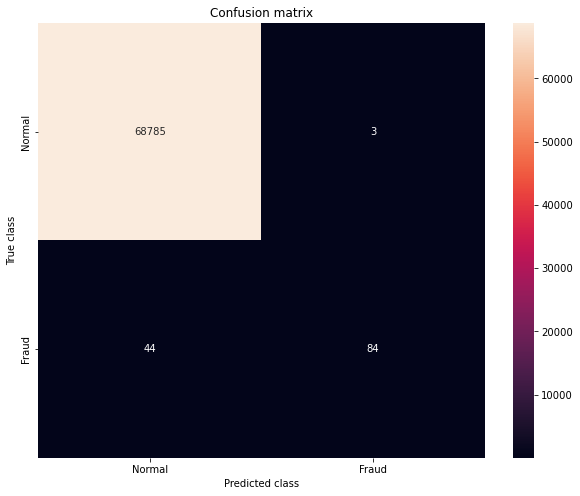

In [64]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,svm_yhat )
plt.figure(figsize =(10, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Random Forest

In [32]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [33]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9991438853096524


In [34]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest model is 0.728110599078341


In [46]:
MCC = matthews_corrcoef(y_test,rf_yhat )
print("The Matthews correlation coefficient is{}".format(MCC))

The Matthews correlation coefficient is0.7397785203205258


In [58]:
prec = precision_score(y_test,  rf_yhat)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, rf_yhat)
print("The recall is {}".format(rec))

The precision is 0.8876404494382022
The recall is 0.6171875


In [41]:
confusion_matrix(y_test, rf_yhat, labels = [0, 1])

array([[68778,    10],
       [   49,    79]], dtype=int64)

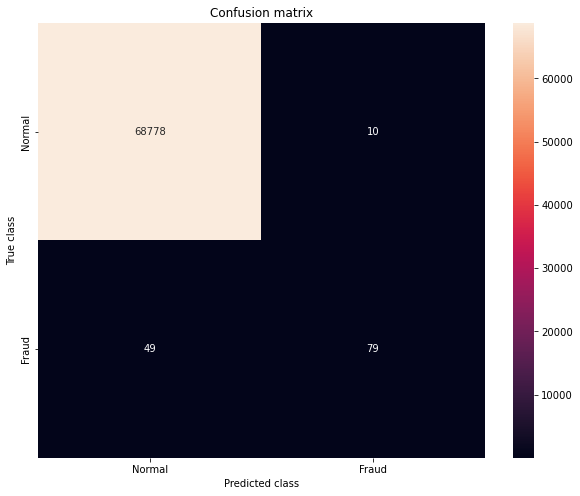

In [66]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,rf_yhat )
plt.figure(figsize =(10, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Decision Tree

In [22]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
tree_yhat = DT.predict(X_test)

In [23]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)))

Accuracy score of the Decision Tree model is 0.9991583957281328


In [24]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))

F1 score of the Decision Tree model is 0.7521367521367521


In [49]:
MCC = matthews_corrcoef(y_test,tree_yhat )
print("The Matthews correlation coefficient is{}".format(MCC))

The Matthews correlation coefficient is0.7550748171302969


In [55]:
prec = precision_score(y_test, tree_yhat)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test,tree_yhat)
print("The recall is {}".format(rec))

The precision is 0.8301886792452831
The recall is 0.6875


Checking the confusion matrix:

In [25]:
confusion_matrix(y_test, tree_yhat, labels = [0, 1])

array([[68770,    18],
       [   40,    88]], dtype=int64)

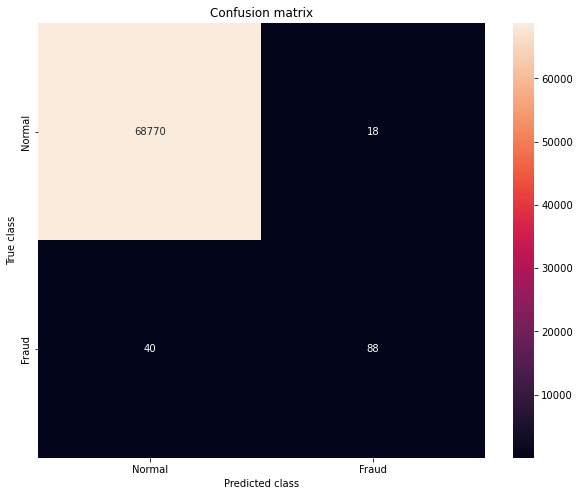

In [67]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, tree_yhat)
plt.figure(figsize =(10, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

the first row represents positive and the second row represents negative. So, we have 68782 as true positive and 18 are false positive. That says, out of 68782+18=68800, we have 68782 that are successfully classified as a normal transaction and 18 were falsely classified as normal — but they were fraudulent.

# K-Nearest Neighbors

In [26]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [27]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.999288989494457


In [28]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, knn_yhat)))

F1 score of the K-Nearest Neighbors model is 0.7949790794979079


In [50]:
MCC = matthews_corrcoef(y_test,knn_yhat )
print("The Matthews correlation coefficient is{}".format(MCC))

The Matthews correlation coefficient is0.7966496051471474


In [54]:
prec = precision_score(y_test, knn_yhat)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test,knn_yhat)
print("The recall is {}".format(rec))

The precision is 0.8558558558558559
The recall is 0.7421875


In [68]:
confusion_matrix(y_test, knn_yhat, labels = [0, 1])

array([[68772,    16],
       [   33,    95]], dtype=int64)

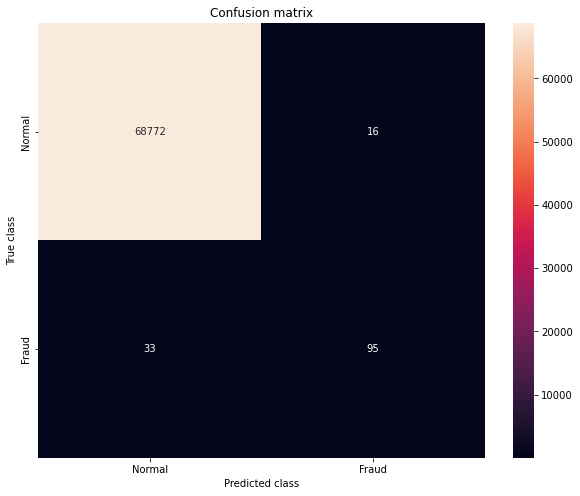

In [69]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_yhat)
plt.figure(figsize =(10, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# XGBoost

In [29]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [30]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.999506645771664


In [31]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

F1 score of the XGBoost model is 0.8495575221238937


In [51]:
MCC = matthews_corrcoef(y_test,xgb_yhat )
print("The Matthews correlation coefficient is{}".format(MCC))

The Matthews correlation coefficient is0.856922787436802


In [53]:
prec = precision_score(y_test, xgb_yhat)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, xgb_yhat)
print("The recall is {}".format(rec))

The precision is 0.9795918367346939
The recall is 0.75


In [70]:
confusion_matrix(y_test, xgb_yhat, labels = [0, 1])

array([[68786,     2],
       [   32,    96]], dtype=int64)

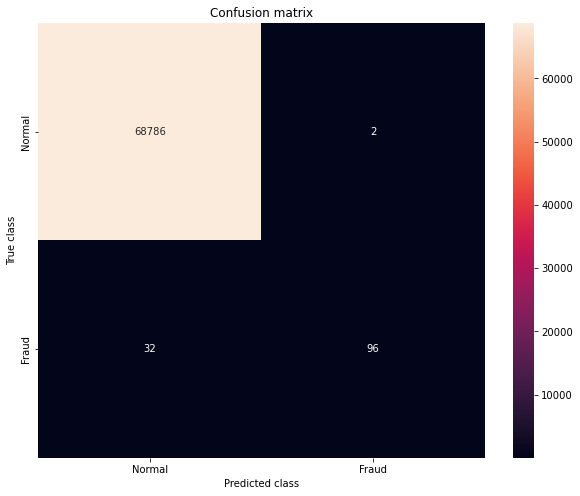

In [71]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, xgb_yhat)
plt.figure(figsize =(10, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [72]:
final_data = pd.DataFrame({'Models':['LR','SVM','RF','DT','KN','XGBoost'],
              "ACC":[accuracy_score(y_test,lr_yhat)*100,
                     accuracy_score(y_test,svm_yhat)*100,
                     accuracy_score(y_test,rf_yhat)*100,
                     accuracy_score(y_test,tree_yhat)*100,
                     accuracy_score(y_test,knn_yhat)*100,
                     accuracy_score(y_test,xgb_yhat)*100
                    ]})

In [73]:
final_data

,Models,ACC
0,LR,99.895525
1,SVM,99.931801
2,RF,99.914389
3,DT,99.915840
4,KN,99.928899
5,XGBoost,99.950665


<AxesSubplot:xlabel='Models', ylabel='ACC'>

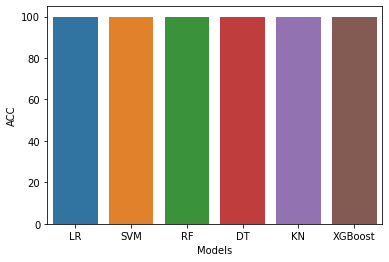

In [74]:
sns.barplot(final_data['Models'],final_data['ACC'])

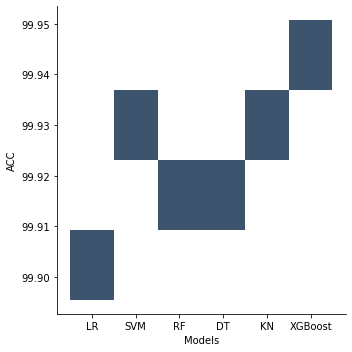

In [80]:
sns.displot(data=final_data,x='Models',y='ACC')

# Conclusion

We just received 99.95% accuracy in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.

Finally, based on our accuracy score — XGBoost is the winner for our case.